# 1. Importing Libraries

In [377]:
# Importing necessary statistical librabries

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})
import datetime
from scipy.stats import pearsonr

In [378]:
# Importing warnings librabries to suppress warnings

import warnings
warnings.filterwarnings('ignore')

In [379]:
# Importing Scikit librabries to evaluate and cleansing parameters

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# 2. Data sourcing and initial checks

In [380]:
# Importing data from csv file

df = pd.read_csv('day.csv')

In [381]:
# Initial data checks

df.shape

(730, 16)

In [382]:
# Preview of the data

df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [383]:
# Checking for Null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


None of the columns contains any NULL values

In [384]:
# Creating copy of dataframe to check for duplicates

df_copy = df.copy()

# checking the shape of new dataframe

df_copy.shape

(730, 16)

In [385]:
# Drop duplicates and verify the shape

df_copy.drop_duplicates(inplace=True)

df_copy.shape

(730, 16)

This implies there are no duplicates rows in the dataset provided

# 3. EDA

### 3.1 Converting specific columns to categorical columns for better understanding the dataset

In [386]:
# Season column conversion to categorical
df.season.replace({1:'Spring',2:'Summer',3:'Fall',4:'Winter'},inplace=True)

In [387]:
# weathersit column conversion to categorical
df.weathersit.replace({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'},inplace=True)

In [388]:
# mnth column conversion to categorical
df.mnth.replace({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                   10:'October',11:'November',12:'December'},inplace=True)

In [389]:
# weekday column conversion to categorical
df.weekday.replace({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'},inplace=True)

In [390]:
# Verifying the changes
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [391]:
# Dropping column instant as it has no effect on target column
# Dropping dteday as we have already mnth, year and weekday columns
# As model targets on 'cnt' column and it is the sum of 'casual' and 'registered', we can drop these two columns

df.drop(['instant','dteday','casual','registered'], axis=1, inplace=True)

In [392]:
# Segregating variables into arrays of Numeric and categorical sets

num_var = ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']
cat_var = ['season', 'mnth','weekday','weathersit']

### 3.2 Creating a pairplot to get an overview of the numerical fields in the data set to that of cnt

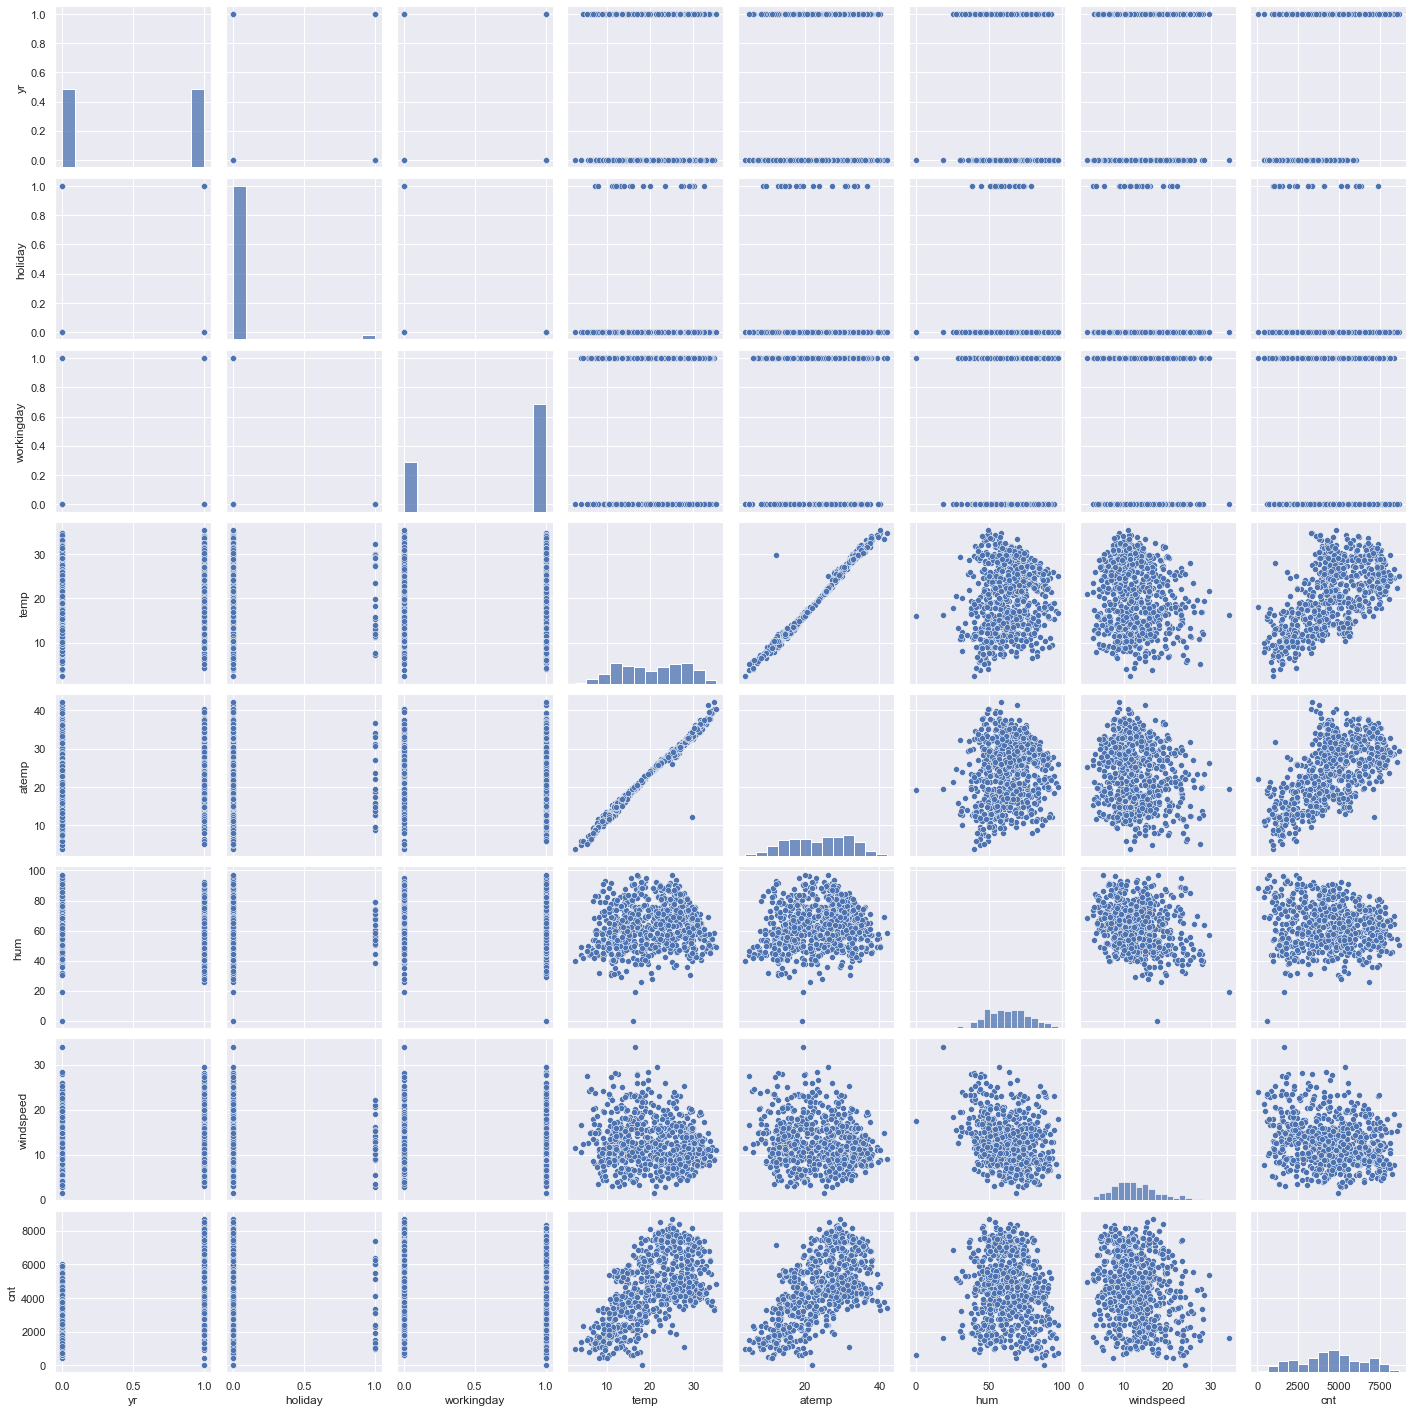

In [393]:
sns.pairplot(df[num_var])
plt.show()

### Following are the few observations that can be inferred from the pairplot with respect to Count as Target Variable:

* Ride Count has increased drastically in 2019 as compared to 2018
* Ride Count is lesser on Holidays as compared to other days.
* Working Day / Non-Working Day shows almost similar behaviour
* Ride Count seems to be very much lienarly dependent on Temperature
* Humidity & windspeed does not indicate any specific behaviour on just visualising the data.

### 3.3 Checking correlation

In [394]:
df.corr()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,0.047215,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.052940,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.047215,-0.032703,0.052940,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,-0.112547,-0.015662,0.023202,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,0.630685,-0.098543,-0.235132,1.000000


Observation: From above table and pairplot it can be observed that temp and atemp is highly correlated, we can drop one of the column.

In [395]:
# Dropping the atemp column as it is highly correlated to temp

df.drop('atemp',axis=1,inplace=True)

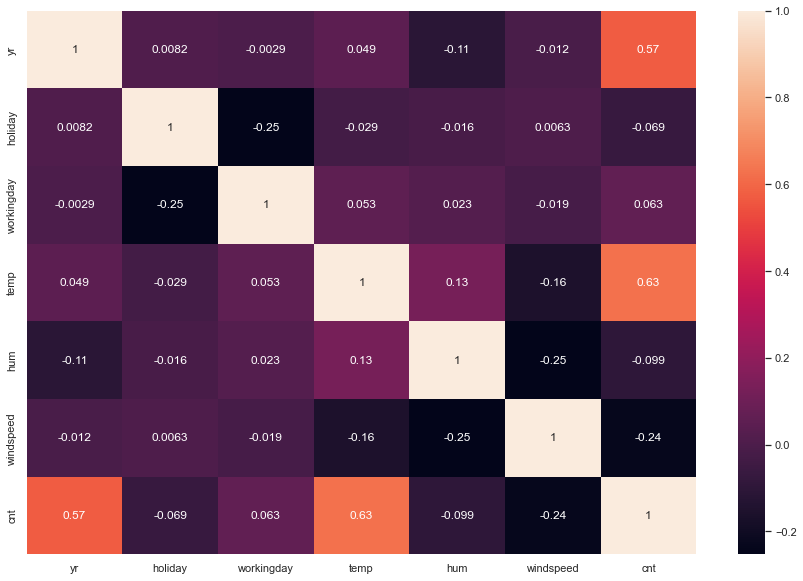

In [396]:
# Creating a heat map to better understand correlation

df_corr = df.corr()
plt.figure(figsize=(15,10))

#Drawing Heatmap of correlation
sns.heatmap(df_corr,annot=True, )
plt.show()

Observations:
* Few variables are showing linear relations, hence, the dataset is appropriate to form linear regression model.
* We can infer that there is a positive linear relation of bike rental demand(cnt) and temp 
* Also, can infer bike rental demand(cnt) has negative relation with humidity and windspeed

### 3.4 Creating a barplots to get an relation between the categorical fields in the data set to that of cnt

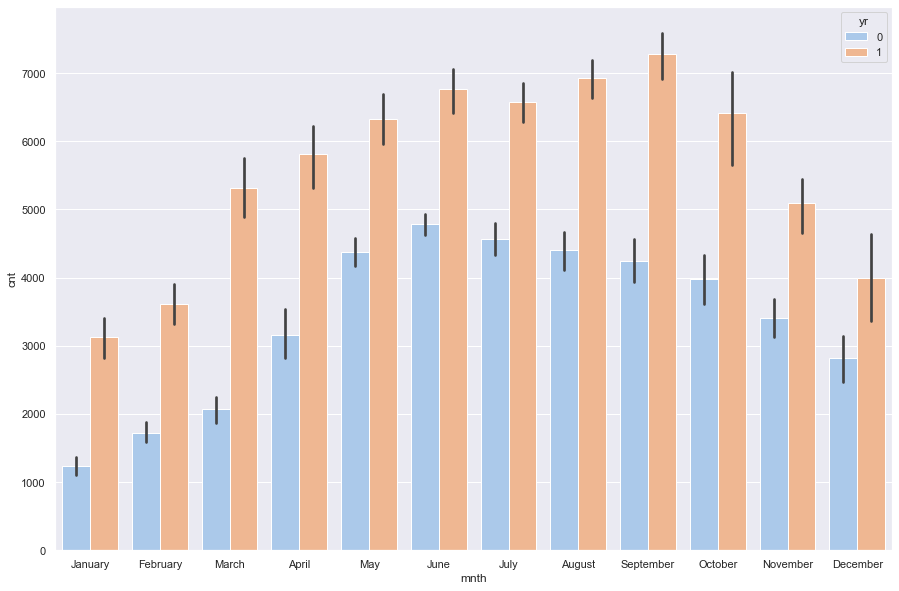

In [397]:
# creating barplot for mnth vs cnt

sns.barplot('mnth', 'cnt',hue = 'yr', data = df, palette = 'pastel')
plt.show()

Observation: Ride Count is more during the period of May to October

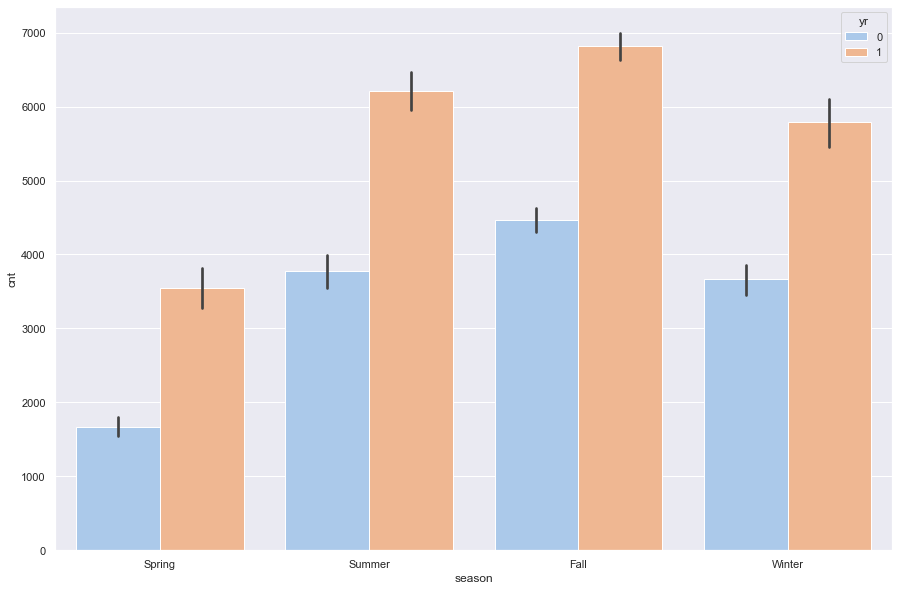

In [398]:
# creating barplot for season vs cnt

sns.barplot('season','cnt',hue = 'yr', data=df, palette = 'pastel')
plt.show()

Observation: Ride Count Seems to be in maximum in Fall (Autumn) followed by Summer, Spring & Winter respectively.

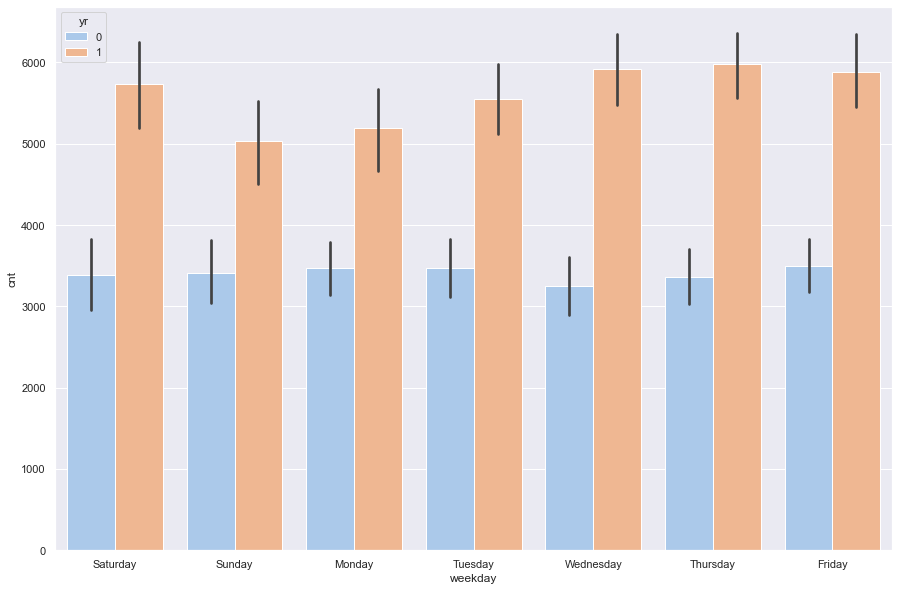

In [399]:
# creating barplot for weekday vs cnt

sns.barplot('weekday','cnt',hue = 'yr', data=df, palette = 'pastel')
plt.show()

Observation: Weekday Column seems to be scattered evenly across all the points. Unable to make out any pattern when predicting Ride Count from the weekday column alone.

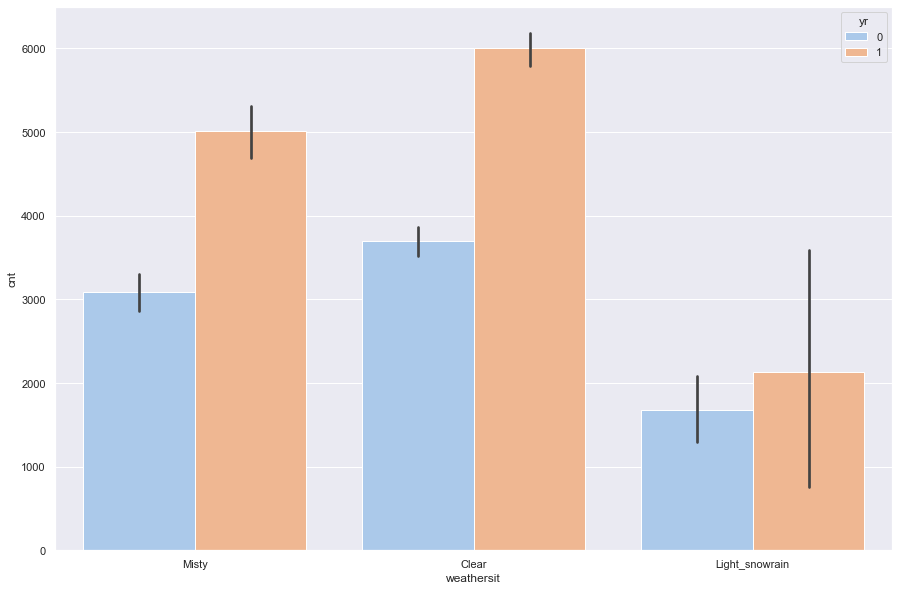

In [400]:
# creating barplot for weathersit vs cnt

sns.barplot('weathersit','cnt',hue = 'yr', data=df, palette = 'pastel')
plt.show()

Observation: Ride Count is more on plesant & moderate Days as compared to Light Snow / Rainfall

# 4. Data Preparation

In [401]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [402]:
# Identifying dummy variable columns

dummy_var_cols = ['mnth', 'season', 'weekday', 'weathersit']

In [403]:
# Creating dummy variables for the columns

dummies = pd.get_dummies(df[dummy_var_cols], drop_first=True)
dummies.head(10)

,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [404]:
#concatenating dataframes

df = pd.concat([df, dummies], axis=1)

In [405]:
# Dropping redundant fields

df = df.drop(columns=dummy_var_cols)

# 5. Data splitting and rescaling

In current use case, we split the data into two parts - 70% as train data and 30% as test data

In [406]:
# Splitting the data into two parts

df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

In [407]:
# Shape of train data

df_train.shape

(510, 29)

In [408]:
# Shape of test data

df_test.shape

(220, 29)

Following Columns are Numerical which needs to be Normalised:
* Year
* Holiday
* Workingday
* Temperature
* Humidity
* Windspeed
* cnt

In [409]:
# Scaling the above list of variables

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

num_var = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snowrain,weathersit_Misty
576,1.0,0.0,1.0,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1.0,0.0,0.0,0.442393,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1.0,0.0,0.0,0.245101,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1.0,0.0,0.0,0.395666,0.504508,0.188475,0.482973,0,0,0,...,1,0,0,1,0,0,0,0,0,1
111,0.0,0.0,1.0,0.345824,0.751824,0.380981,0.191095,0,0,0,...,1,0,0,0,0,0,0,0,0,1


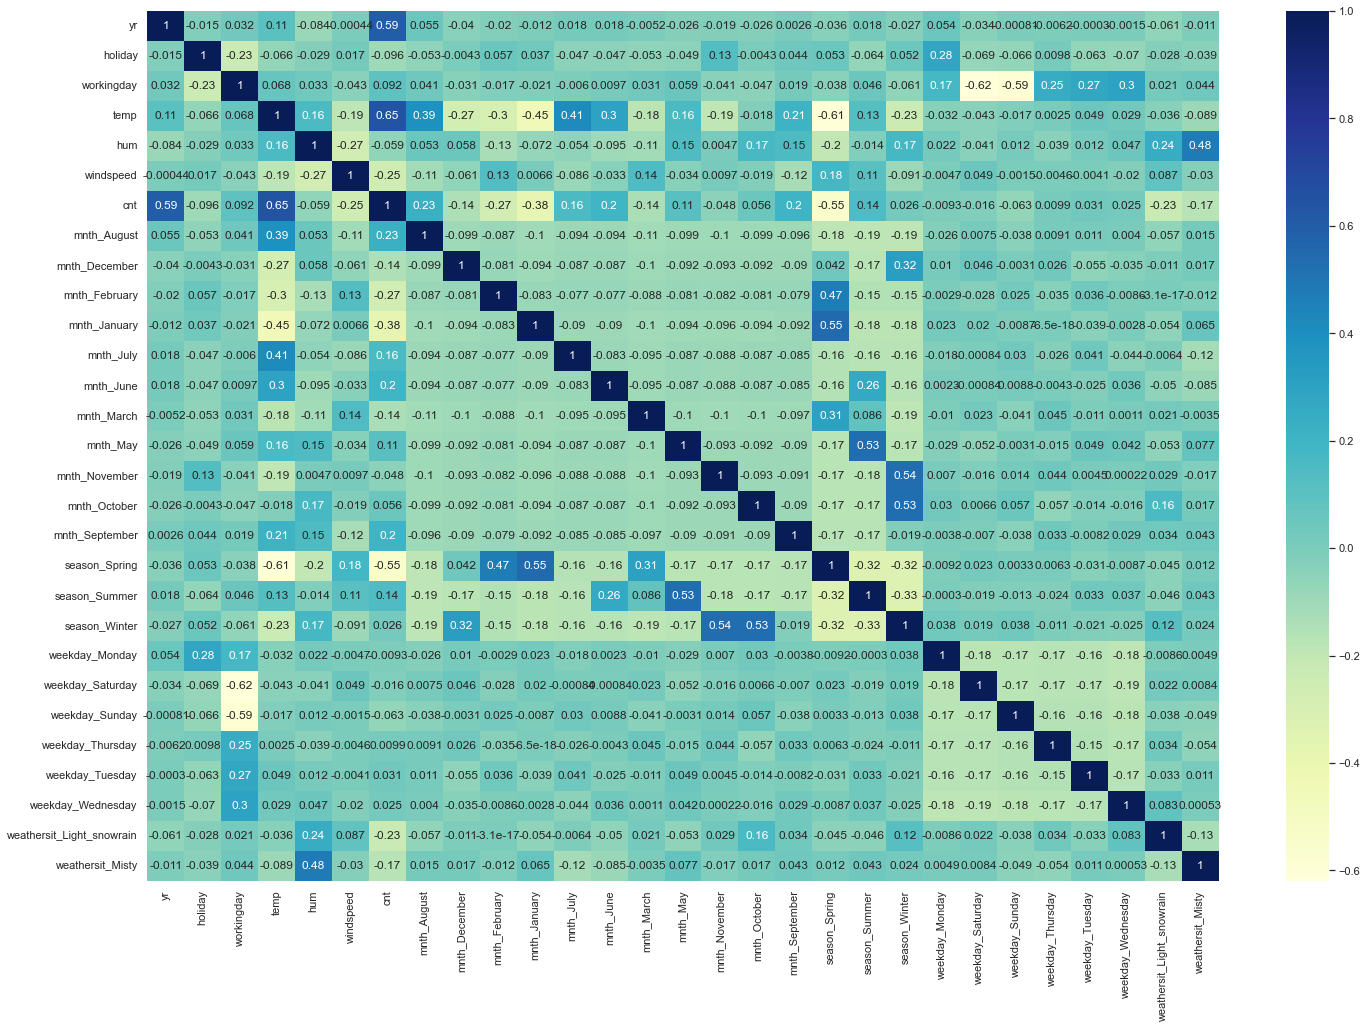

In [410]:
# Checking correlation

plt.figure(figsize = (24, 16))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above Correlation Coefficient Heatmap, we can infer that no variable is highly correlated with another variable in any way. 
So, we can further proceed and check Multi-Collinearity while creating models.

## 6. Building and Training the model

In [411]:
# Fixing trained target and trained feature variables

y_train = df_train.pop('cnt')
X_train = df_train

In [412]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr1 = sm.OLS(y_train, X_train_lm).fit()
lr1.params

const                        0.243106
yr                           0.232438
holiday                      0.010042
workingday                   0.096177
temp                         0.445359
hum                         -0.151473
windspeed                   -0.186010
mnth_August                  0.020376
mnth_December               -0.044277
mnth_February               -0.032441
mnth_January                -0.063315
mnth_July                   -0.033848
mnth_June                    0.004602
mnth_March                   0.001274
mnth_May                     0.024673
mnth_November               -0.039879
mnth_October                 0.007546
mnth_September               0.085938
season_Spring               -0.044834
season_Summer                0.043002
season_Winter                0.107632
weekday_Monday              -0.020931
weekday_Saturday             0.095554
weekday_Sunday               0.041333
weekday_Thursday            -0.009131
weekday_Tuesday             -0.017931
weekday_Wedn

In [413]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          3.00e-181
Time:                        22:50:15   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [414]:
# Checking VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif = vif.reset_index(drop=True)
vif

,Features,VIF
0,workingday,85.54
1,weekday_Saturday,19.71
2,weekday_Sunday,18.34
3,season_Spring,10.75
4,season_Winter,9.44
5,season_Summer,8.27
6,temp,7.08
7,mnth_November,6.79
8,mnth_October,6.47
9,mnth_August,6.36


* Currently, we have almost 28 predictors predicting our outcome. Analyzing these many predictors can be very complex.
* To simplify the process, we will use RFE (Recursive Feature Elimination) method which will provide us with set of variables ranked in an order of importance (of impacting target outcome variable)
* We will pass an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0.

In [415]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [416]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
21,weekday_Saturday,True,1
19,season_Winter,True,1
18,season_Summer,True,1
17,season_Spring,True,1
16,mnth_September,True,1
26,weathersit_Light_snowrain,True,1
10,mnth_July,True,1
9,mnth_January,True,1
27,weathersit_Misty,True,1


* RFE method has successfully evaluated top 15 predictors (ranking as 1) which will impact our outcome.
* However, we will not rely on this enitirely and continue validating these 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements

In [417]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          4.22e-191
Time:                        22:50:15   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2519      0.036      6.969      0.000       0.181       0.323
yr                            0.2305      0.008     28.795      0.000       0.215       0.246
holiday                      -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                    0.0433      0.012      3.762      0.000       0.021       0.066
temp                          0.5096      0.034     14.837      0.000       0.442       0.577
hum                          -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                    -0.1863      0.025     -7.310      0.000      -0.236      -0.136
mnth_January                 -0.0345      0.017     -1.989      0.047      -0.069      -0.000
mnth_July                    -0.0529      0.018     -2.931      0.004      -0.088      -0.017
mnth_September                0.0814      0.016      4.945      0.000       0.049       0.114
season_Spring                -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_Summer                 0.0508      0.015      3.423      0.001       0.022       0.080
season_Winter                 0.0933      0.017      5.403      0.000       0.059       0.127
weekday_Saturday              0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light_snowrain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Misty             -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [418]:
# Dropping column and building model again

col = col.drop(['holiday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.4
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          3.01e-191
Time:                        22:50:15   Log-Likelihood:                 517.24
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -941.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2428      0.036      6.737      0.000       0.172       0.314
yr                            0.2308      0.008     28.720      0.000       0.215       0.247
workingday                    0.0520      0.011      4.795      0.000       0.031       0.073
temp                          0.5094      0.034     14.775      0.000       0.442       0.577
hum                          -0.1546      0.037     -4.128      0.000      -0.228      -0.081
windspeed                    -0.1869      0.026     -7.310      0.000      -0.237      -0.137
mnth_January                 -0.0352      0.017     -2.019      0.044      -0.069      -0.001
mnth_July                    -0.0518      0.018     -2.857      0.004      -0.087      -0.016
mnth_September                0.0794      0.016      4.811      0.000       0.047       0.112
season_Spring                -0.0519      0.021     -2.502      0.013      -0.093      -0.011
season_Summer                 0.0510      0.015      3.429      0.001       0.022       0.080
season_Winter                 0.0922      0.017      5.324      0.000       0.058       0.126
weekday_Saturday              0.0623      0.014      4.461      0.000       0.035       0.090
weathersit_Light_snowrain    -0.2467      0.026     -9.445      0.000      -0.298      -0.195
weathersit_Misty             -0.0561      0.010     -5.394      0.000      -0.076      -0.036
==============================================================================
Omnibus:                       73.357   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              188.156
Skew:                          -0.726   Prob(JB):                     1.39e-41
Kurtosis:                       5.597   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [419]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,29.31
2,temp,17.66
1,workingday,4.73
4,windspeed,4.71
8,season_Spring,4.48
10,season_Winter,3.42
9,season_Summer,2.84
13,weathersit_Misty,2.28
0,yr,2.09
11,weekday_Saturday,1.84


In [420]:
# Dropping column and building model again

col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          8.68e-189
Time:                        22:50:15   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1657      0.031      5.292      0.000       0.104       0.227
yr                            0.2346      0.008     28.941      0.000       0.219       0.251
workingday                    0.0546      0.011      4.967      0.000       0.033       0.076
temp                          0.4724      0.034     13.966      0.000       0.406       0.539
windspeed                    -0.1572      0.025     -6.306      0.000      -0.206      -0.108
mnth_January                 -0.0398      0.018     -2.252      0.025      -0.074      -0.005
mnth_July                    -0.0468      0.018     -2.549      0.011      -0.083      -0.011
mnth_September                0.0736      0.017      4.406      0.000       0.041       0.106
season_Spring                -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_Summer                 0.0448      0.015      2.980      0.003       0.015       0.074
season_Winter                 0.0775      0.017      4.499      0.000       0.044       0.111
weekday_Saturday              0.0667      0.014      4.710      0.000       0.039       0.094
weathersit_Light_snowrain    -0.2896      0.024    -11.895      0.000      -0.337      -0.242
weathersit_Misty             -0.0807      0.009     -9.351      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [421]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
7,season_Spring,2.99
8,season_Summer,2.33
0,yr,2.08
9,season_Winter,1.91
10,weekday_Saturday,1.84
4,mnth_January,1.62
5,mnth_July,1.59


In [422]:
# Dropping column and building model again

col = col.drop(['mnth_January'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          7.12e-189
Time:                        22:50:15   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1492      0.031      4.881      0.000       0.089       0.209
yr                            0.2339      0.008     28.756      0.000       0.218       0.250
workingday                    0.0545      0.011      4.938      0.000       0.033       0.076
temp                          0.4920      0.033     14.991      0.000       0.427       0.556
windspeed                    -0.1499      0.025     -6.040      0.000      -0.199      -0.101
mnth_July                    -0.0486      0.018     -2.637      0.009      -0.085      -0.012
mnth_September                0.0740      0.017      4.414      0.000       0.041       0.107
season_Spring                -0.0664      0.021     -3.182      0.002      -0.107      -0.025
season_Summer                 0.0481      0.015      3.196      0.001       0.019       0.078
season_Winter                 0.0838      0.017      4.910      0.000       0.050       0.117
weekday_Saturday              0.0664      0.014      4.671      0.000       0.038       0.094
weathersit_Light_snowrain    -0.2883      0.024    -11.795      0.000      -0.336      -0.240
weathersit_Misty             -0.0817      0.009     -9.428      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       72.429   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              183.537
Skew:                          -0.721   Prob(JB):                     1.40e-40
Kurtosis:                       5.560   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [423]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
6,season_Spring,2.38
7,season_Summer,2.32
0,yr,2.07
8,season_Winter,1.91
9,weekday_Saturday,1.83
4,mnth_July,1.58
11,weathersit_Misty,1.57


In [424]:
# Dropping column and building model again

col = col.drop(['workingday'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.2
Date:                Sat, 16 Sep 2023   Prob (F-statistic):          6.54e-185
Time:                        22:50:16   Log-Likelihood:                 493.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     498   BIC:                            -912.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1935      0.030      6.468      0.000       0.135       0.252
yr                            0.2344      0.008     28.168      0.000       0.218       0.251
temp                          0.4935      0.034     14.698      0.000       0.428       0.560
windspeed                    -0.1519      0.025     -5.982      0.000      -0.202      -0.102
mnth_July                    -0.0515      0.019     -2.734      0.006      -0.089      -0.015
mnth_September                0.0733      0.017      4.271      0.000       0.040       0.107
season_Spring                -0.0693      0.021     -3.244      0.001      -0.111      -0.027
season_Summer                 0.0472      0.015      3.070      0.002       0.017       0.077
season_Winter                 0.0791      0.017      4.537      0.000       0.045       0.113
weekday_Saturday              0.0229      0.011      2.006      0.045       0.000       0.045
weathersit_Light_snowrain    -0.2807      0.025    -11.246      0.000      -0.330      -0.232
weathersit_Misty             -0.0787      0.009     -8.897      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       76.531   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.911
Skew:                          -0.792   Prob(JB):                     3.84e-39
Kurtosis:                       5.412   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [425]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.62
6,season_Summer,2.23
5,season_Spring,2.08
0,yr,2.07
7,season_Winter,1.78
3,mnth_July,1.58
10,weathersit_Misty,1.55
4,mnth_September,1.33
8,weekday_Saturday,1.18


## 7. Residual Analysis of train data

In [426]:
y_train_cnt = lr_model.predict(X_train_sm)

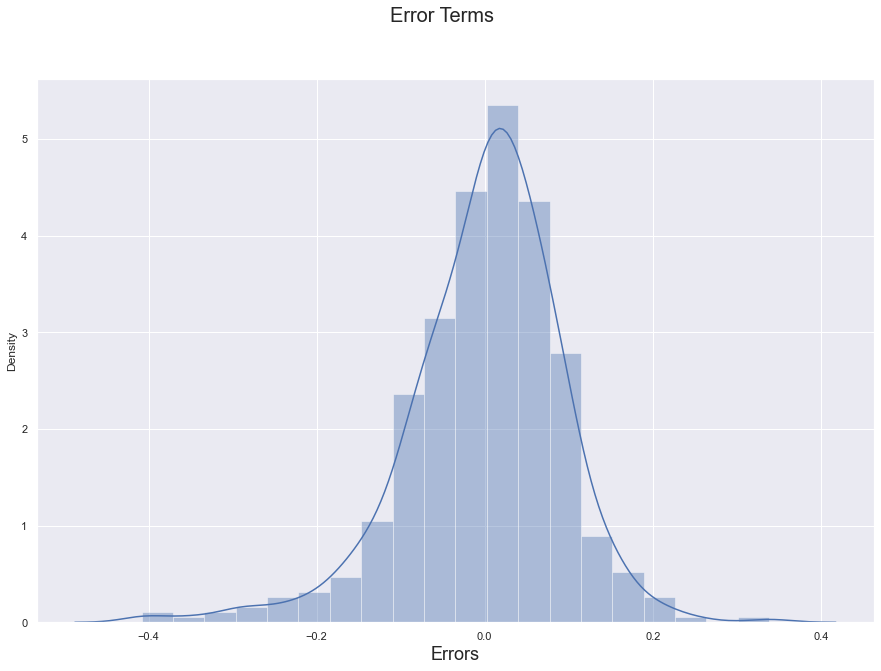

In [427]:
# Plot the histogram of the error terms

fig = plt.figure()
residual = y_train - y_train_cnt
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)
plt.show()

Note: From the above graph, we can infer that error distribution is normallly distributed across 0, which indicates that our model has handled the assumption of error normal distribution properly.

## 8. Homoscedasticity

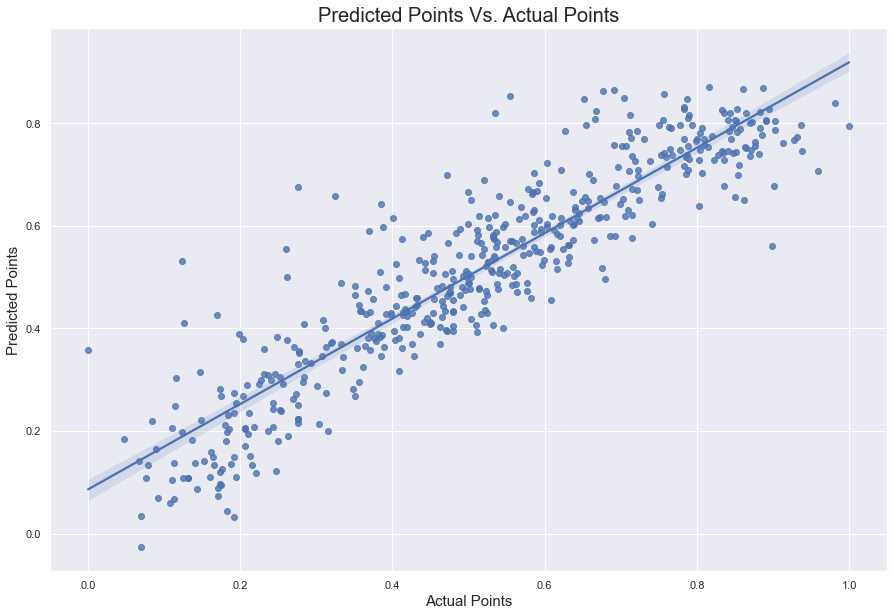

In [428]:
sns.regplot(x=y_train, y=y_train_cnt)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

From the above graph, 
* we can infer that residuals are equal distributed across predicted value.
* It implies, we see equal variance and we do not observe high concentration of data points in certain region & low conecentarion in certain regions.

This proves Homoscedasticity of Error Terms

## 9. Predictions and Evaluation on the test set

In [429]:
num_var = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt']
df_test[num_var] = scaler.transform(df_test[num_var])

In [430]:
df_test.head(10)

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_August,mnth_December,mnth_February,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_snowrain,weathersit_Misty
184,0.0,1.0,0.0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,0.0,1.0,0.901354,0.610133,0.153728,0.712034,0,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0.0,0.0,1.0,0.511964,0.837699,0.334206,0.303382,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0.0,0.0,1.0,0.881625,0.437098,0.339570,0.547400,1,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0.0,0.0,1.0,0.817246,0.314298,0.537414,0.569029,0,0,0,...,1,0,0,0,0,1,0,0,0,0
404,1.0,0.0,1.0,0.256524,0.579218,0.326196,0.438104,0,0,1,...,0,0,0,0,0,1,0,0,0,0
198,0.0,0.0,1.0,0.856704,0.671103,0.372990,0.510354,0,0,0,...,0,0,1,0,0,0,0,0,0,0
171,0.0,0.0,1.0,0.774672,0.793903,0.276724,0.553728,0,0,0,...,0,0,0,0,0,0,1,0,0,1
512,1.0,1.0,0.0,0.814131,0.696865,0.331536,0.692706,0,0,0,...,1,0,1,0,0,0,0,0,0,0
200,0.0,0.0,1.0,0.883701,0.728638,0.153738,0.495858,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [431]:
y_test = df_test.pop('cnt')

In [432]:
X_test = df_test

In [433]:
# Adding constant variable to test dataframe

X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [434]:
y_test_pred = lr_model.predict(X_test_new)

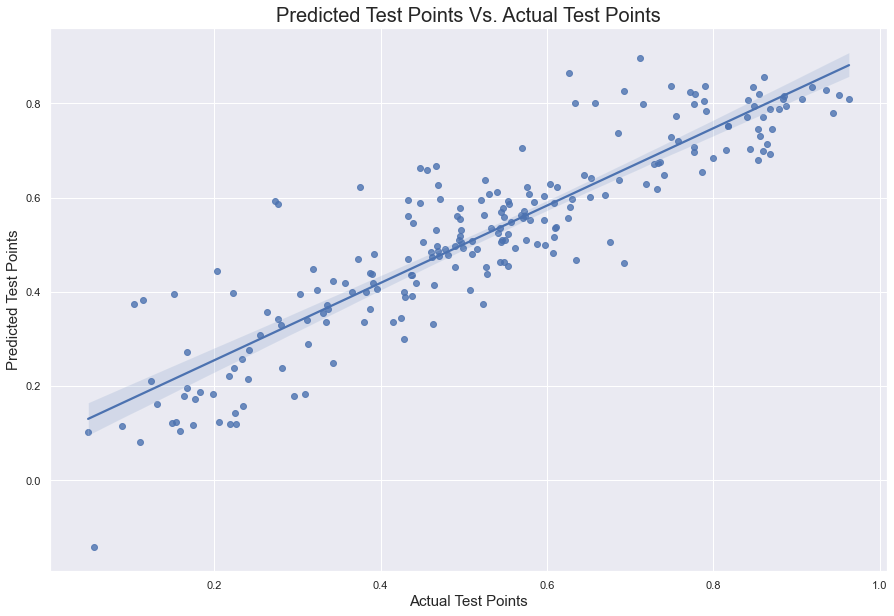

In [435]:
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

Above plot depicts linear relationship between actual test data points & predicted test data points

## 10. Generating R-Square

In [436]:
from sklearn.metrics import r2_score

In [437]:
r2_score(y_test, y_test_pred)

0.8040630045169549